In [6]:
!pip install PyTDC


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: C:\Users\pahad\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [7]:
from tdc import utils
names = utils.retrieve_benchmark_names('ADMET_Group')


In [8]:
!pip install tensorflow deepchem


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: C:\Users\pahad\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [9]:
import deepchem as dc
from tdc.single_pred import ADME
from tdc.single_pred import Tox

# Load the dataset
data = Tox(name = 'Skin Reaction')
split = data.get_split()


# Featurize data
featurizer = dc.feat.OneHotFeaturizer()
train_features = featurizer.featurize(split['train']['Drug'])
test_features = featurizer.featurize(split['test']['Drug'])

# Inspect the shape of the features
print("Train features shape:", train_features.shape)
print("Test features shape:", test_features.shape)


Found local copy...
Loading...
Done!


Train features shape: (283, 100, 35)
Test features shape: (81, 100, 35)


In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Function to convert SMILES to one-hot encoded sequences
def one_hot_smiles(smiles_list, max_length):
    tokenizer = Tokenizer(char_level=True)
    tokenizer.fit_on_texts(smiles_list)
    sequences = tokenizer.texts_to_sequences(smiles_list)
    one_hot = pad_sequences(sequences, maxlen=max_length, padding='post')
    return one_hot, tokenizer.word_index

# Determine max length for padding
max_smiles_length = max(len(s) for s in split['train']['Drug'])

# Apply one-hot encoding
train_smiles = split['train']['Drug']
test_smiles = split['test']['Drug']
train_features, _ = one_hot_smiles(train_smiles, max_smiles_length)
test_features, _ = one_hot_smiles(test_smiles, max_smiles_length)

print("Train features shape:", train_features.shape)
print("Test features shape:", test_features.shape)


Train features shape: (283, 94)
Test features shape: (81, 94)


In [11]:
import pandas as pd

# Assuming you have a dictionary 'split' with 'train' and 'test' splits for 'Drug' information
train_df = pd.DataFrame({'SMILES': train_smiles, 'OneHotSequence': train_features.tolist()})
test_df = pd.DataFrame({'SMILES': test_smiles, 'OneHotSequence': test_features.tolist()})

# Display the first few rows of the DataFrames
print("Train DataFrame:")
print(train_df.head())

print("\nTest DataFrame:")
print(test_df.head())


Train DataFrame:
                                              SMILES  \
0               CCCOc1ccc(Br)c(C(=O)c2ccc(OC)cc2O)c1   
1                                         CC=C(C)C=O   
2  O=C1C([PH](c2ccccc2)(c2ccccc2)c2ccccc2)CCN1c1c...   
3                                   C=C(C=CCC(C)C)CC   
4                        CCOCc1cc(OC)c(B(O)O)c(OC)c1   

                                      OneHotSequence  
0  [1, 1, 1, 4, 1, 5, 1, 1, 1, 2, 16, 17, 3, 1, 2...  
1  [1, 1, 6, 1, 2, 1, 3, 1, 6, 4, 0, 0, 0, 0, 0, ...  
2  [4, 6, 1, 5, 1, 2, 9, 24, 22, 10, 2, 1, 8, 1, ...  
3  [1, 6, 1, 2, 1, 6, 1, 1, 1, 2, 1, 3, 1, 3, 1, ...  
4  [1, 1, 4, 1, 1, 5, 1, 1, 2, 4, 1, 3, 1, 2, 16,...  

Test DataFrame:
                                              SMILES  \
0                                CCOC(=O)c1ccc(N)cc1   
1                                      CCC(O)C(CO)CO   
2                                     C=CCCCCCCCCC=O   
3  COc1cc(C)c2c(Oc3cccc(C(F)(F)F)c3)c(OC)cc(NC(C)...   
4                 O

In [12]:
print(train_df.head(10))


                                              SMILES  \
0               CCCOc1ccc(Br)c(C(=O)c2ccc(OC)cc2O)c1   
1                                         CC=C(C)C=O   
2  O=C1C([PH](c2ccccc2)(c2ccccc2)c2ccccc2)CCN1c1c...   
3                                   C=C(C=CCC(C)C)CC   
4                        CCOCc1cc(OC)c(B(O)O)c(OC)c1   
5        CCCCc1ccc(C(=O)CC(=O)c2cc(C)c(C)c(C)c2C)cc1   
6            CCOc1ccc(C(=O)Cc2ccc(S(C)(=O)=O)cc2)cc1   
7                     CC(C)(C)OC(=O)N1CC(F)CC1C(N)=O   
8                     CC(C)(C)OC(=O)N1CC(F)CC1C(=O)O   
9     Cc1nc(COc2ccc(CC(NC(=O)OC(C)(C)C)C3CO3)cc2)cs1   

                                      OneHotSequence  
0  [1, 1, 1, 4, 1, 5, 1, 1, 1, 2, 16, 17, 3, 1, 2...  
1  [1, 1, 6, 1, 2, 1, 3, 1, 6, 4, 0, 0, 0, 0, 0, ...  
2  [4, 6, 1, 5, 1, 2, 9, 24, 22, 10, 2, 1, 8, 1, ...  
3  [1, 6, 1, 2, 1, 6, 1, 1, 1, 2, 1, 3, 1, 3, 1, ...  
4  [1, 1, 4, 1, 1, 5, 1, 1, 2, 4, 1, 3, 1, 2, 16,...  
5  [1, 1, 1, 1, 1, 5, 1, 1, 1, 2, 1, 2, 6, 4, 3, ... 

In [7]:
!pip install rdkit-pypi


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: C:\Users\pahad\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [11]:
import rdkit
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem  # Add this import

# Define your SMILES notation
smiles = "CCCOc1ccc(Br)c(C(=O)c2ccc(OC)cc2O)c1"

# Generate a molecule object from SMILES notation
mol = Chem.MolFromSmiles(smiles)

# Check if the molecule was successfully generated
if mol is not None:
    # Generate a 2D coordinate representation
    mol = Chem.AddHs(mol)  # Add hydrogens for visualization (optional)
    AllChem.Compute2DCoords(mol)  # Generate 2D coordinates using Compute2DCoords

    # Visualize the molecule
    Draw.MolToImage(mol).show()
else:
    print("Invalid SMILES notation. Unable to generate the molecule.")


In [12]:
from rdkit import Chem

# Define your SMILES notation
smiles = "CCCOc1ccc(Br)c(C(=O)c2ccc(OC)cc2O)c1"

# Generate a molecule object from SMILES notation
mol = Chem.MolFromSmiles(smiles)

# Check if the molecule was successfully generated
if mol is not None:
    # Calculate the molecular formula
    formula = Chem.rdMolDescriptors.CalcMolFormula(mol)

    print("Chemical Formula:", formula)
else:
    print("Invalid SMILES notation. Unable to generate the molecule.")


Chemical Formula: C17H17BrO4


In [13]:
from rdkit import Chem

# Define your SMILES notation
smiles = "CCCOc1ccc(Br)c(C(=O)c2ccc(OC)cc2O)c1"

# Generate a molecule object from SMILES notation
mol = Chem.MolFromSmiles(smiles)

# Check if the molecule was successfully generated
if mol is not None:
    # Calculate the molecular weight
    molecular_weight = Chem.rdMolDescriptors.CalcExactMolWt(mol)

    print("Molecular Weight:", molecular_weight)
else:
    print("Invalid SMILES notation. Unable to generate the molecule.")


Molecular Weight: 364.03102112399995


In [15]:
from rdkit import Chem

# Define your SMILES notation
smiles = "CCCOc1ccc(Br)c(C(=O)c2ccc(OC)cc2O)c1"

# Generate a molecule object from SMILES notation
mol = Chem.MolFromSmiles(smiles)

# Check if the molecule was successfully generated
if mol is not None:
    # Define SMARTS patterns for functional groups
    functional_group_smarts = {
        "Ketone": "[C;H1,H2]=[O;H1]",
        "Ether": "[#6][#8][#6]",
        "Bromine": "[Br]",
    }

    # Detect and print functional groups
    print("Functional Groups:")
    for fg_name, smarts_pattern in functional_group_smarts.items():
        fg_matches = mol.GetSubstructMatches(Chem.MolFromSmarts(smarts_pattern))
        if fg_matches:
            print(f"{fg_name}: {len(fg_matches)} occurrences")
        else:
            print(f"{fg_name}: Not found")

else:
    print("Invalid SMILES notation. Unable to generate the molecule.")


Functional Groups:
Ketone: Not found
Ether: 2 occurrences
Bromine: 1 occurrences


In [16]:
from rdkit import Chem
from rdkit.Chem import Descriptors

# Define your SMILES notation
smiles = "CCCOc1ccc(Br)c(C(=O)c2ccc(OC)cc2O)c1"

# Generate a molecule object from SMILES notation
mol = Chem.MolFromSmiles(smiles)

# Check if the molecule was successfully generated
if mol is not None:
    # Calculate various chemical properties
    molecular_weight = Descriptors.MolWt(mol)
    logP_octanol_water = Descriptors.MolLogP(mol)
    hydrogen_bond_donors = Descriptors.NumHDonors(mol)
    hydrogen_bond_acceptors = Descriptors.NumHAcceptors(mol)
    rotatable_bonds = Descriptors.NumRotatableBonds(mol)
    
    print("Chemical Properties:")
    print(f"Molecular Weight: {molecular_weight:.2f} g/mol")
    print(f"LogP (Octanol-Water Partition Coefficient): {logP_octanol_water:.2f}")
    print(f"Hydrogen Bond Donors: {hydrogen_bond_donors}")
    print(f"Hydrogen Bond Acceptors: {hydrogen_bond_acceptors}")
    print(f"Rotatable Bonds: {rotatable_bonds}")
else:
    print("Invalid SMILES notation. Unable to generate the molecule.")


Chemical Properties:
Molecular Weight: 365.22 g/mol
LogP (Octanol-Water Partition Coefficient): 4.18
Hydrogen Bond Donors: 1
Hydrogen Bond Acceptors: 4
Rotatable Bonds: 6


In [26]:
from rdkit import Chem
from rdkit.Chem import Lipinski

# Define your SMILES notation
smiles = "CCCOc1ccc(Br)c(C(=O)c2ccc(OC)cc2O)c1"

# Generate a molecule object from SMILES notation
mol = Chem.MolFromSmiles(smiles)

# Check if the molecule was successfully generated
if mol is not None:
    # Calculate Lipinski's descriptors
    molecular_weight = Chem.Descriptors.MolWt(mol)
    logP = Chem.Crippen.MolLogP(mol)
    num_hydrogen_donors = Lipinski.NumHDonors(mol)
    num_hydrogen_acceptors = Lipinski.NumHAcceptors(mol)

    # Check if the compound follows Lipinski's Rule of Five
    if (
        molecular_weight <= 500 and
        logP <= 5 and
        num_hydrogen_donors <= 5 and
        num_hydrogen_acceptors <= 10
    ):
        print("The compound follows Lipinski's Rule of Five.")
    else:
        print("The compound does not follow Lipinski's Rule of Five.")
else:
    print("Invalid SMILES notation. Unable to generate the molecule.")


The compound follows Lipinski's Rule of Five.


In [27]:
from rdkit import Chem
from rdkit.Chem import AllChem

# Define SMILES notations for reactants
reactant1_smiles = "CCO"  # Ethanol
reactant2_smiles = "ClCCCl"  # 1,2-Dichloroethane

# Generate molecule objects from SMILES notations
reactant1 = Chem.MolFromSmiles(reactant1_smiles)
reactant2 = Chem.MolFromSmiles(reactant2_smiles)

# Check if the reactants were successfully generated
if reactant1 is not None and reactant2 is not None:
    # Perform a simple reaction (e.g., combining reactants)
    product = AllChem.CombineMols(reactant1, reactant2)

    # Convert the product molecule to SMILES notation
    product_smiles = Chem.MolToSmiles(product)

    print("Product SMILES:", product_smiles)
else:
    print("Invalid SMILES notation for one or more reactants.")


Product SMILES: CCO.ClCCCl


In [28]:
from rdkit import Chem
from rdkit.Chem import Descriptors

# Define your SMILES notation
smiles = "CCCOc1ccc(Br)c(C(=O)c2ccc(OC)cc2O)c1"

# Generate a molecule object from SMILES notation
mol = Chem.MolFromSmiles(smiles)

# Check if the molecule was successfully generated
if mol is not None:
    # Calculate the molecular weight
    molecular_weight = Descriptors.MolWt(mol)

    # Define a threshold for biological activity
    activity_threshold = 300  # Adjust this threshold as needed

    # Compare the molecular weight to the threshold
    if molecular_weight < activity_threshold:
        print("The compound is predicted to have biological activity.")
    else:
        print("The compound is predicted to have low biological activity.")
else:
    print("Invalid SMILES notation. Unable to generate the molecule.")


The compound is predicted to have low biological activity.


In [33]:
import requests
from bs4 import BeautifulSoup

# Define the SMILES notation
smiles = "CCCOc1ccc(Br)c(C(=O)c2ccc(OC)cc2O)c1"

# Encode the SMILES notation for URL
encoded_smiles = requests.utils.quote(smiles)

# Create a search URL for the NIST Chemistry WebBook
search_url = f"https://webbook.nist.gov/cgi/cbook.cgi?SMILES={encoded_smiles}&Units=SI"

# Send an HTTP GET request to the search URL
response = requests.get(search_url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content of the response using BeautifulSoup
    soup = BeautifulSoup(response.text, "html.parser")
    
    # Find the section containing the IR spectra data
    ir_spectra_section = soup.find("h2", text="Infrared Spectrum")
    
    if ir_spectra_section:
        # Extract and print the IR spectra data
        ir_spectra_data = ir_spectra_section.find_next("pre").text
        print("IR Spectra Data:")
        print(ir_spectra_data)
    else:
        print("IR spectra data not found for the compound.")
else:
    print("Failed to retrieve data from the NIST Chemistry WebBook.")


Failed to retrieve data from the NIST Chemistry WebBook.


In [ ]:
#graph visualization

In [1]:
!pip install -c conda-forge rdkit

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'conda-forge'

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: C:\Users\pahad\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [2]:
!pip install networkx


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: C:\Users\pahad\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


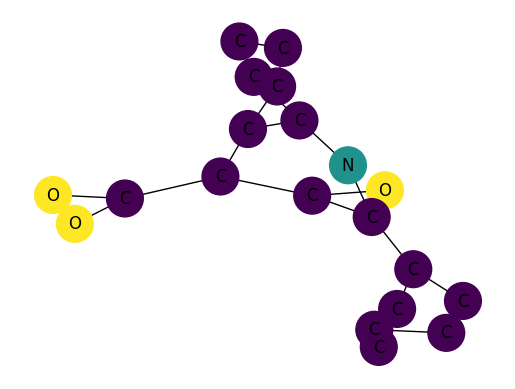

In [3]:
from rdkit import Chem
from rdkit.Chem import Draw
import networkx as nx
import matplotlib.pyplot as plt

# SMILES string for the compound
smiles = "O=C(O)c1c(O)c(-c2ccccc2)nc2ccccc12"

# Parse the SMILES string to a molecule object
molecule = Chem.MolFromSmiles(smiles)

# Create a graph from the molecule object
molecule_graph = nx.Graph()

# Add nodes and edges to the graph
for atom in molecule.GetAtoms():
    molecule_graph.add_node(atom.GetIdx(), element=atom.GetSymbol())

for bond in molecule.GetBonds():
    molecule_graph.add_edge(bond.GetBeginAtomIdx(), bond.GetEndAtomIdx())

# Draw the graph
pos = nx.spring_layout(molecule_graph)  # positions for all nodes
nx.draw_networkx_nodes(molecule_graph, pos, node_size=700,
                       node_color=[atom.GetAtomicNum() for atom in molecule.GetAtoms()])
nx.draw_networkx_edges(molecule_graph, pos)
nx.draw_networkx_labels(molecule_graph, pos, labels={idx: data['element'] for idx, data in molecule_graph.nodes(data=True)})

# Show the plot
plt.axis('off')  # Turn off the axis
plt.show()


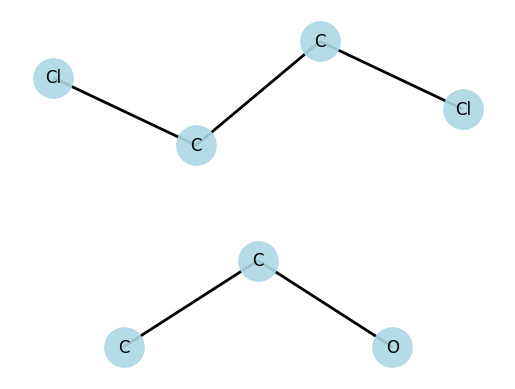

In [5]:
from rdkit import Chem
from rdkit.Chem import AllChem
import networkx as nx
import matplotlib.pyplot as plt

# Your SMILES string
smiles = "CCO.ClCCCl"

# Create RDKit molecule from SMILES
molecule = Chem.MolFromSmiles(smiles)

# Generate 2D coordinates for the molecule
AllChem.Compute2DCoords(molecule)

# Initialize NetworkX graph
G = nx.Graph()

# Add nodes and edges to the graph
for atom in molecule.GetAtoms():
    pos = molecule.GetConformer().GetAtomPosition(atom.GetIdx())
    G.add_node(atom.GetIdx(), element=atom.GetSymbol(), pos=(pos.x, pos.y))

for bond in molecule.GetBonds():
    G.add_edge(bond.GetBeginAtomIdx(), bond.GetEndAtomIdx())

# Get positions from the node attributes for the layout
pos = nx.get_node_attributes(G, 'pos')

# Draw the nodes
nx.draw_networkx_nodes(G, pos, node_size=800, node_color='lightblue', alpha=0.9)

# Draw the edges with increased linewidth
nx.draw_networkx_edges(G, pos, edge_color='black', width=2)

# Draw the labels
node_labels = nx.get_node_attributes(G, 'element')
nx.draw_networkx_labels(G, pos, labels=node_labels)

# Show the plot
plt.axis('off')
plt.show()


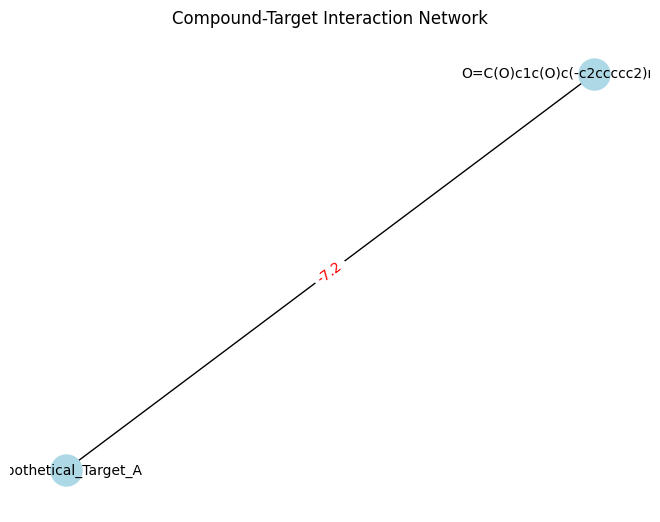

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a network graph
G = nx.Graph()

# Add compound and target nodes
compound = "O=C(O)c1c(O)c(-c2ccccc2)nc2ccccc12"
target = "Hypothetical_Target_A"

G.add_node(compound, node_type="compound")
G.add_node(target, node_type="target")

# Add an edge to represent the interaction (e.g., binding affinity)
interaction_data = {"interaction_type": "binding", "binding_affinity": -7.2}
G.add_edge(compound, target, **interaction_data)

# Visualize the network graph
pos = nx.spring_layout(G)  # Layout algorithm for node positioning
nx.draw(G, pos, with_labels=True, node_size=500, node_color="lightblue", font_size=10, font_color="black")
edge_labels = nx.get_edge_attributes(G, "binding_affinity")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color="red")
plt.title("Compound-Target Interaction Network")
plt.show()


In [6]:
import numpy as np

train_features = np.array(train_features)
test_features = np.array(test_features)


In [7]:
import numpy as np
import deepchem as dc
from tdc.single_pred import ADME
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the dataset
data = Tox(name = 'Skin Reaction')
split = data.get_split()

# Function to convert SMILES to one-hot encoded sequences
def one_hot_smiles(smiles_list, max_length):
    tokenizer = Tokenizer(char_level=True)
    tokenizer.fit_on_texts(smiles_list)
    sequences = tokenizer.texts_to_sequences(smiles_list)
    one_hot = pad_sequences(sequences, maxlen=max_length, padding='post')
    return one_hot, tokenizer.word_index

# Determine max length for padding
max_smiles_length = max(len(s) for s in split['train']['Drug'])

# Apply one-hot encoding
train_smiles = split['train']['Drug']
test_smiles = split['test']['Drug']
train_features, _ = one_hot_smiles(train_smiles, max_smiles_length)
test_features, _ = one_hot_smiles(test_smiles, max_smiles_length)

# Ensure features are NumPy arrays
train_features = np.array(train_features)
test_features = np.array(test_features)

# Reshape features for LSTM input
train_features_lstm = np.reshape(train_features, (train_features.shape[0], train_features.shape[1], 1))
test_features_lstm = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

# Define the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(max_smiles_length, 1)))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_features_lstm, split['train']['Y'], epochs=50, batch_size=128)

# Evaluate the model
loss, accuracy = model.evaluate(test_features_lstm, split['test']['Y'])
print(f'Test Accuracy: {accuracy}')


Found local copy...
Loading...
Done!


Epoch 1/50
3/3 [==============================] - 3s 47ms/step - loss: 0.6934 - accuracy: 0.5689
Epoch 2/50
3/3 [==============================] - 0s 39ms/step - loss: 0.6869 - accuracy: 0.6926
Epoch 3/50
3/3 [==============================] - 0s 39ms/step - loss: 0.6795 - accuracy: 0.6996
Epoch 4/50
3/3 [==============================] - 0s 45ms/step - loss: 0.6702 - accuracy: 0.6996
Epoch 5/50
3/3 [==============================] - 0s 43ms/step - loss: 0.6554 - accuracy: 0.7067
Epoch 6/50
3/3 [==============================] - 0s 43ms/step - loss: 0.6291 - accuracy: 0.7138
Epoch 7/50
3/3 [==============================] - 0s 39ms/step - loss: 0.5930 - accuracy: 0.7102
Epoch 8/50
3/3 [==============================] - 0s 41ms/step - loss: 0.5931 - accuracy: 0.7350
Epoch 9/50
3/3 [==============================] - 0s 39ms/step - loss: 0.5900 - accuracy: 0.7173
Epoch 10/50
3/3 [==============================] - 0s 47ms/step - loss: 0.5876 - accuracy: 0.7138
Epoch 11/50
3/3 [============

In [9]:
import numpy as np
import deepchem as dc
from tdc.single_pred import ADME
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the dataset
data = Tox(name = 'Skin Reaction')
split = data.get_split()

# Function to convert SMILES to one-hot encoded sequences
def one_hot_smiles(smiles_list, max_length):
    tokenizer = Tokenizer(char_level=True)
    tokenizer.fit_on_texts(smiles_list)
    sequences = tokenizer.texts_to_sequences(smiles_list)
    one_hot = pad_sequences(sequences, maxlen=max_length, padding='post')
    return one_hot

# Determine max length for padding
max_smiles_length = max(len(s) for s in split['train']['Drug'])

# Apply one-hot encoding
train_smiles = split['train']['Drug']
test_smiles = split['test']['Drug']
train_features = one_hot_smiles(train_smiles, max_smiles_length)
test_features = one_hot_smiles(test_smiles, max_smiles_length)

# Ensure features are NumPy arrays
train_features = np.array(train_features)
test_features = np.array(test_features)

# Define the Feed-Forward Neural Network model
ffnn_model = Sequential()
ffnn_model.add(Flatten(input_shape=(max_smiles_length,)))
ffnn_model.add(Dense(128, activation='relu'))
ffnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
ffnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
ffnn_model.fit(train_features, split['train']['Y'], epochs=50, batch_size=128)

# Evaluate the model
loss, accuracy = ffnn_model.evaluate(test_features, split['test']['Y'])
print(f'Test Accuracy: {accuracy}')


Found local copy...
Loading...
Done!


Epoch 1/50
3/3 [==============================] - 1s 8ms/step - loss: 1.2811 - accuracy: 0.3322
Epoch 2/50
3/3 [==============================] - 0s 0s/step - loss: 0.9366 - accuracy: 0.5230
Epoch 3/50
3/3 [==============================] - 0s 0s/step - loss: 0.8265 - accuracy: 0.6537
Epoch 4/50
3/3 [==============================] - 0s 0s/step - loss: 0.7573 - accuracy: 0.6890
Epoch 5/50
3/3 [==============================] - 0s 0s/step - loss: 0.7128 - accuracy: 0.6784
Epoch 6/50
3/3 [==============================] - 0s 8ms/step - loss: 0.6549 - accuracy: 0.6820
Epoch 7/50
3/3 [==============================] - 0s 0s/step - loss: 0.6175 - accuracy: 0.6890
Epoch 8/50
3/3 [==============================] - 0s 2ms/step - loss: 0.5851 - accuracy: 0.6926
Epoch 9/50
3/3 [==============================] - 0s 0s/step - loss: 0.5573 - accuracy: 0.7314
Epoch 10/50
3/3 [==============================] - 0s 8ms/step - loss: 0.5313 - accuracy: 0.7420
Epoch 11/50
3/3 [============================

3/3 [==============================] - 1s 8ms/step
Confusion Matrix:
 [[ 8 24]
 [ 2 47]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.25      0.38        32
           1       0.66      0.96      0.78        49

    accuracy                           0.68        81
   macro avg       0.73      0.60      0.58        81
weighted avg       0.72      0.68      0.62        81



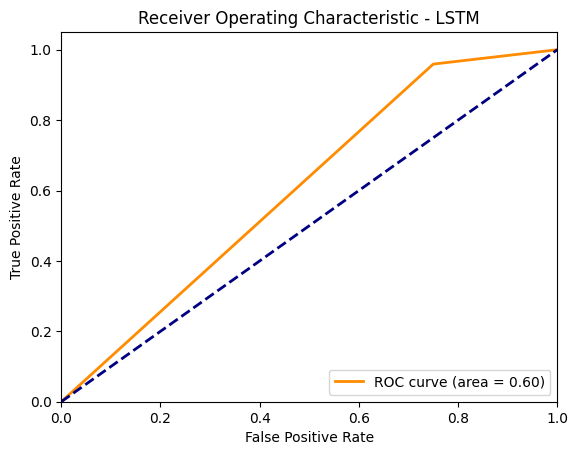

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predictions
lstm_predictions = model.predict(test_features_lstm)
lstm_predictions = (lstm_predictions > 0.5).astype("int32")

# Confusion Matrix
conf_matrix = confusion_matrix(split['test']['Y'], lstm_predictions)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
print("\nClassification Report:\n", classification_report(split['test']['Y'], lstm_predictions))

# ROC Curve
fpr, tpr, thresholds = roc_curve(split['test']['Y'], lstm_predictions)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - LSTM')
plt.legend(loc="lower right")
plt.show()


3/3 [==============================] - 0s 0s/step
Confusion Matrix:
 [[ 9 23]
 [ 8 41]]

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.28      0.37        32
           1       0.64      0.84      0.73        49

    accuracy                           0.62        81
   macro avg       0.59      0.56      0.55        81
weighted avg       0.60      0.62      0.58        81



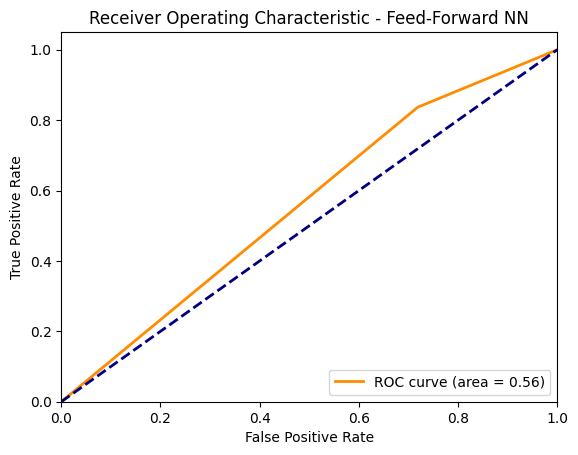

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Predictions with Feed-Forward Neural Network model
ffnn_predictions = ffnn_model.predict(test_features)
ffnn_predictions = (ffnn_predictions > 0.5).astype("int32")

# Confusion Matrix
conf_matrix = confusion_matrix(split['test']['Y'], ffnn_predictions)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
print("\nClassification Report:\n", classification_report(split['test']['Y'], ffnn_predictions))

# ROC Curve
fpr, tpr, thresholds = roc_curve(split['test']['Y'], ffnn_predictions)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Feed-Forward NN')
plt.legend(loc="lower right")
plt.show()


In [12]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, matthews_corrcoef
import numpy as np

# Predictions with Feed-Forward Neural Network model
ffnn_predictions = ffnn_model.predict(test_features)
ffnn_predictions_binary = (ffnn_predictions > 0.5).astype(int)

# Confusion Matrix
conf_matrix = confusion_matrix(split['test']['Y'], ffnn_predictions_binary)

# Extracting True Positives, True Negatives, False Positives, False Negatives
tp = conf_matrix[1, 1]
tn = conf_matrix[0, 0]
fp = conf_matrix[0, 1]
fn = conf_matrix[1, 0]

# Calculating metrics
accuracy = (tp + tn) / (tp + tn + fp + fn)
sensitivity = tp / (tp + fn)  # Also known as Recall
specificity = tn / (tn + fp)
mcc = matthews_corrcoef(split['test']['Y'], ffnn_predictions_binary)
auc = roc_auc_score(split['test']['Y'], ffnn_predictions)

# Print metrics
print(f"Loss: {loss}")
print(f"Accuracy (ACC): {accuracy}")
print(f"AUC: {auc}")
print(f"Sensitivity (Sen): {sensitivity}")
print(f"Specificity (Spe): {specificity}")
print(f"Matthews Correlation Coefficient (MCC): {mcc}")


3/3 [==============================] - 0s 8ms/step
Loss: 0.8082013726234436
Accuracy (ACC): 0.6172839506172839
AUC: 0.5931122448979592
Sensitivity (Sen): 0.8367346938775511
Specificity (Spe): 0.28125
Matthews Correlation Coefficient (MCC): 0.14163945647930418


In [13]:
# Train the model and capture history
history = ffnn_model.fit(train_features, split['train']['Y'], 
                         epochs=50, batch_size=128,
                         validation_data=(test_features, split['test']['Y']),
                         verbose=1)


Epoch 1/50
3/3 [==============================] - 0s 39ms/step - loss: 0.2856 - accuracy: 0.9011 - val_loss: 0.8135 - val_accuracy: 0.6296
Epoch 2/50
3/3 [==============================] - 0s 16ms/step - loss: 0.2816 - accuracy: 0.8940 - val_loss: 0.8331 - val_accuracy: 0.6173
Epoch 3/50
3/3 [==============================] - 0s 31ms/step - loss: 0.2802 - accuracy: 0.8728 - val_loss: 0.8444 - val_accuracy: 0.6173
Epoch 4/50
3/3 [==============================] - 0s 18ms/step - loss: 0.2775 - accuracy: 0.8693 - val_loss: 0.8368 - val_accuracy: 0.6296
Epoch 5/50
3/3 [==============================] - 0s 17ms/step - loss: 0.2733 - accuracy: 0.8869 - val_loss: 0.8215 - val_accuracy: 0.6420
Epoch 6/50
3/3 [==============================] - 0s 16ms/step - loss: 0.2704 - accuracy: 0.9081 - val_loss: 0.8205 - val_accuracy: 0.6296
Epoch 7/50
3/3 [==============================] - 0s 9ms/step - loss: 0.2682 - accuracy: 0.9081 - val_loss: 0.8303 - val_accuracy: 0.6296
Epoch 8/50
3/3 [============

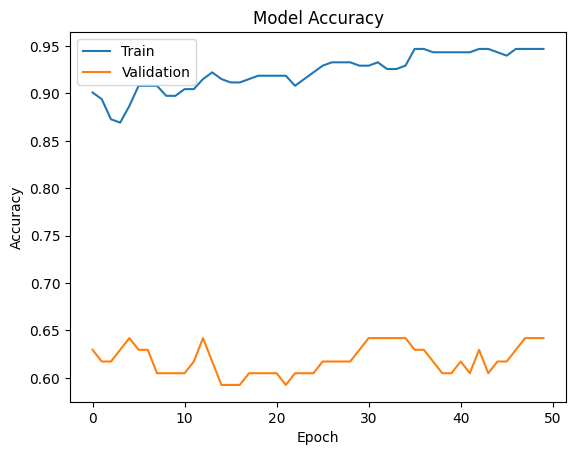

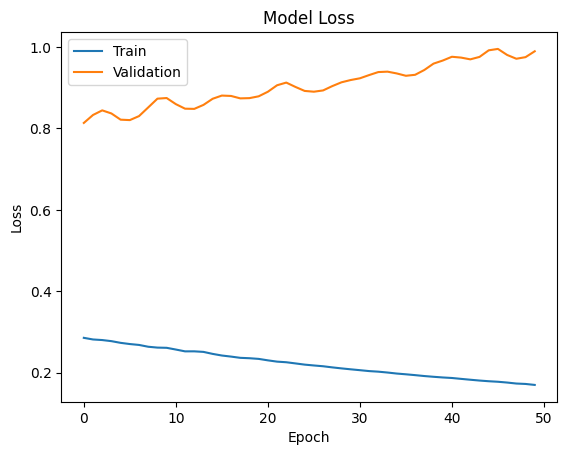

In [14]:
import matplotlib.pyplot as plt

# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [17]:
from tensorflow.keras.callbacks import Callback
from sklearn.metrics import roc_auc_score

class RocAucCallback(Callback):
    def __init__(self, training_data, validation_data):
        self.x_train = training_data[0]
        self.y_train = training_data[1]
        self.x_val = validation_data[0]
        self.y_val = validation_data[1]
        self.train_auc = []
        self.val_auc = []

    def on_epoch_end(self, epoch, logs=None):
        train_pred = self.model.predict(self.x_train)
        val_pred = self.model.predict(self.x_val)
        train_auc = roc_auc_score(self.y_train, train_pred)
        val_auc = roc_auc_score(self.y_val, val_pred)
        self.train_auc.append(train_auc)
        self.val_auc.append(val_auc)
        print(f'\nEpoch {epoch + 1}: train_auc: {train_auc}, val_auc: {val_auc}')


In [18]:
roc_auc_callback = RocAucCallback(training_data=(train_features, split['train']['Y']),
                                  validation_data=(test_features, split['test']['Y']))

history = ffnn_model.fit(train_features, split['train']['Y'], 
                         epochs=50, batch_size=128,
                         validation_data=(test_features, split['test']['Y']),
                         callbacks=[roc_auc_callback],
                         verbose=1)

Epoch 1/50
3/3 [==============================] - 0s 0s/step

Epoch 1: train_auc: 0.9973023692235514, val_auc: 0.59375
3/3 [==============================] - 0s 119ms/step - loss: 0.1684 - accuracy: 0.9470 - val_loss: 0.9955 - val_accuracy: 0.6420
Epoch 2/50
3/3 [==============================] - 0s 8ms/step

Epoch 2: train_auc: 0.9974783016654938, val_auc: 0.5975765306122449
3/3 [==============================] - 0s 83ms/step - loss: 0.1667 - accuracy: 0.9470 - val_loss: 0.9928 - val_accuracy: 0.6420
Epoch 3/50
3/3 [==============================] - 0s 0s/step

Epoch 3: train_auc: 0.9975369458128078, val_auc: 0.5943877551020409
3/3 [==============================] - 0s 83ms/step - loss: 0.1649 - accuracy: 0.9470 - val_loss: 1.0042 - val_accuracy: 0.6296
Epoch 4/50
3/3 [==============================] - 0s 0s/step

Epoch 4: train_auc: 0.9974196575181796, val_auc: 0.59375
3/3 [==============================] - 0s 91ms/step - loss: 0.1631 - accuracy: 0.9470 - val_loss: 1.0162 - val_accur

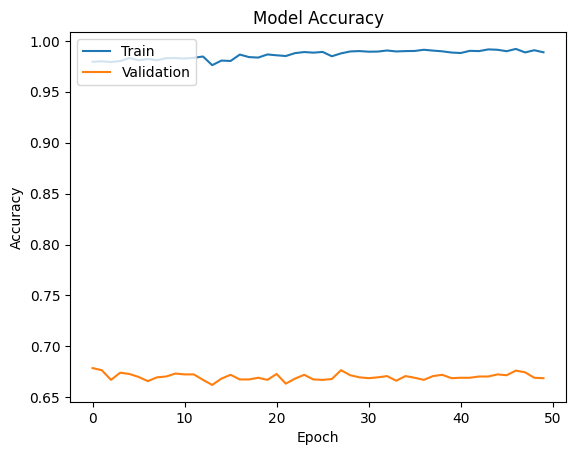

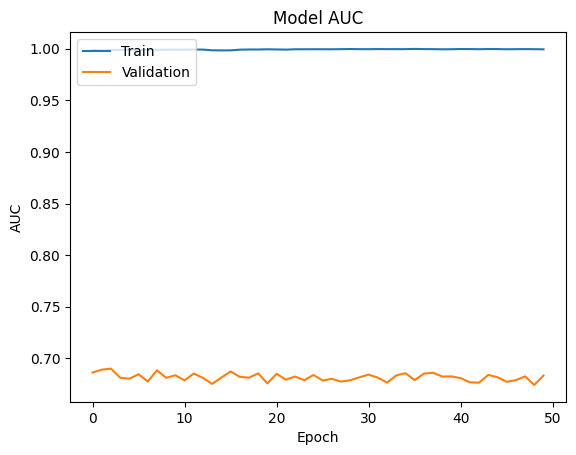

In [40]:
# Plotting Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plotting AUC
plt.plot(roc_auc_callback.train_auc)
plt.plot(roc_auc_callback.val_auc)
plt.title('Model AUC')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [21]:
from sklearn.metrics import confusion_matrix, matthews_corrcoef

class MetricsCallback(Callback):
    def __init__(self, training_data, validation_data):
        self.x_train = training_data[0]
        self.y_train = training_data[1]
        self.x_val = validation_data[0]
        self.y_val = validation_data[1]
        self.train_sen = []
        self.val_sen = []
        self.train_spe = []
        self.val_spe = []
        self.train_mcc = []
        self.val_mcc = []

    def on_epoch_end(self, epoch, logs=None):
        train_pred = (self.model.predict(self.x_train) > 0.5).astype(int)
        val_pred = (self.model.predict(self.x_val) > 0.5).astype(int)

        # Compute confusion matrix for both train and validation sets
        train_cm = confusion_matrix(self.y_train, train_pred)
        val_cm = confusion_matrix(self.y_val, val_pred)

        # Calculate metrics
        train_sen, train_spe = self.calculate_sen_spe(train_cm)
        val_sen, val_spe = self.calculate_sen_spe(val_cm)

        train_mcc = matthews_corrcoef(self.y_train, train_pred)
        val_mcc = matthews_corrcoef(self.y_val, val_pred)

        # Append metrics to lists
        self.train_sen.append(train_sen)
        self.val_sen.append(val_sen)
        self.train_spe.append(train_spe)
        self.val_spe.append(val_spe)
        self.train_mcc.append(train_mcc)
        self.val_mcc.append(val_mcc)

    def calculate_sen_spe(self, cm):
        tp = cm[1, 1]
        tn = cm[0, 0]
        fp = cm[0, 1]
        fn = cm[1, 0]
        sensitivity = tp / (tp + fn)
        specificity = tn / (tn + fp)
        return sensitivity, specificity


In [22]:
metrics_callback = MetricsCallback(training_data=(train_features, split['train']['Y']),
                                   validation_data=(test_features, split['test']['Y']))

history = ffnn_model.fit(train_features, split['train']['Y'], 
                         epochs=50, batch_size=128,
                         validation_data=(test_features, split['test']['Y']),
                         callbacks=[metrics_callback],
                         verbose=1)


Epoch 1/50
3/3 [==============================] - 0s 119ms/step - loss: 0.1036 - accuracy: 0.9823 - val_loss: 1.2255 - val_accuracy: 0.6296
Epoch 2/50
3/3 [==============================] - 0s 83ms/step - loss: 0.1018 - accuracy: 0.9859 - val_loss: 1.2063 - val_accuracy: 0.6173
Epoch 3/50
3/3 [==============================] - 0s 83ms/step - loss: 0.1019 - accuracy: 0.9859 - val_loss: 1.2034 - val_accuracy: 0.6173
Epoch 4/50
3/3 [==============================] - 0s 94ms/step - loss: 0.1015 - accuracy: 0.9823 - val_loss: 1.2096 - val_accuracy: 0.6049
Epoch 5/50
3/3 [==============================] - 0s 88ms/step - loss: 0.0999 - accuracy: 0.9859 - val_loss: 1.2276 - val_accuracy: 0.6173
Epoch 6/50
3/3 [==============================] - 0s 103ms/step - loss: 0.0981 - accuracy: 0.9894 - val_loss: 1.2456 - val_accuracy: 0.6296
Epoch 7/50
3/3 [==============================] - 0s 91ms/step - loss: 0.0976 - accuracy: 0.9894 - val_loss: 1.2611 - val_accuracy: 0.6296
Epoch 8/50
3/3 [=========

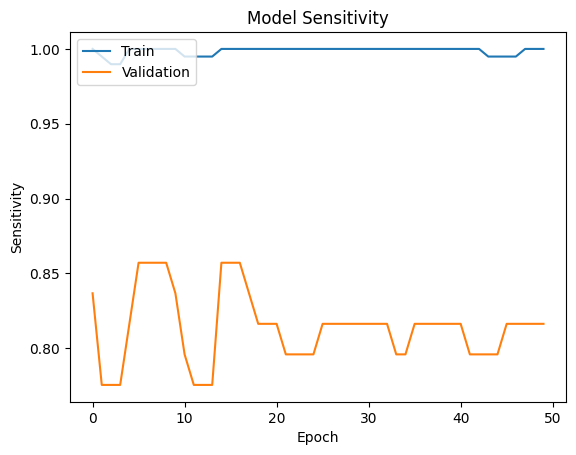

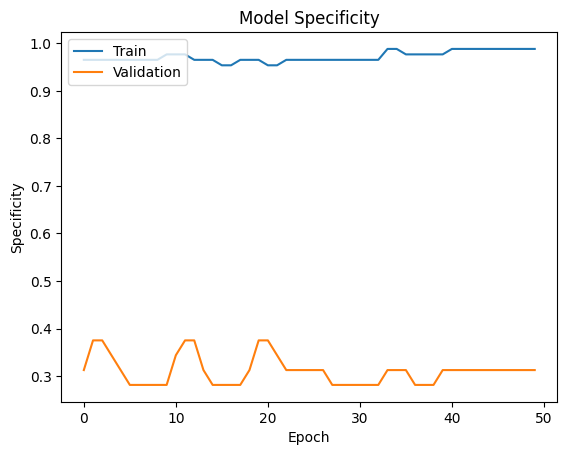

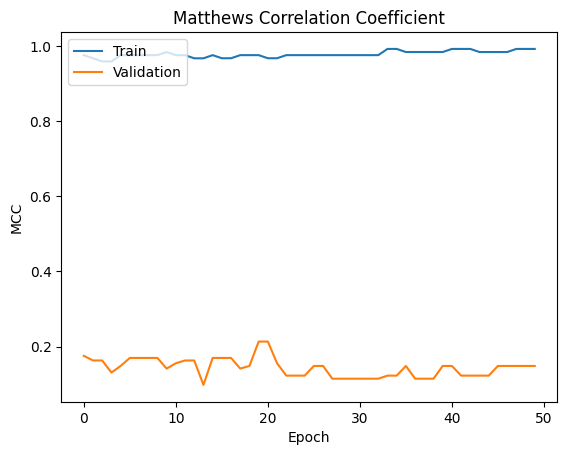

In [23]:
# Plotting Sensitivity
plt.plot(metrics_callback.train_sen)
plt.plot(metrics_callback.val_sen)
plt.title('Model Sensitivity')
plt.ylabel('Sensitivity')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plotting Specificity
plt.plot(metrics_callback.train_spe)
plt.plot(metrics_callback.val_spe)
plt.title('Model Specificity')
plt.ylabel('Specificity')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plotting Matthews Correlation Coefficient
plt.plot(metrics_callback.train_mcc)
plt.plot(metrics_callback.val_mcc)
plt.title('Matthews Correlation Coefficient')
plt.ylabel('MCC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [52]:
#Plots for LSTM

In [24]:
from tensorflow.keras.callbacks import Callback
from sklearn.metrics import confusion_matrix, matthews_corrcoef

class LSTM_MetricsCallback(Callback):
    def __init__(self, training_data, validation_data):
        self.x_train = training_data[0]
        self.y_train = training_data[1]
        self.x_val = validation_data[0]
        self.y_val = validation_data[1]
        self.train_sen = []
        self.val_sen = []
        self.train_spe = []
        self.val_spe = []
        self.train_mcc = []
        self.val_mcc = []

    def on_epoch_end(self, epoch, logs=None):
        train_pred = (self.model.predict(self.x_train) > 0.5).astype(int)
        val_pred = (self.model.predict(self.x_val) > 0.5).astype(int)

        # Compute confusion matrix for both train and validation sets
        train_cm = confusion_matrix(self.y_train, train_pred)
        val_cm = confusion_matrix(self.y_val, val_pred)

        # Calculate metrics
        train_sen, train_spe = self.calculate_sen_spe(train_cm)
        val_sen, val_spe = self.calculate_sen_spe(val_cm)

        train_mcc = matthews_corrcoef(self.y_train, train_pred)
        val_mcc = matthews_corrcoef(self.y_val, val_pred)

        # Append metrics to lists
        self.train_sen.append(train_sen)
        self.val_sen.append(val_sen)
        self.train_spe.append(train_spe)
        self.val_spe.append(val_spe)
        self.train_mcc.append(train_mcc)
        self.val_mcc.append(val_mcc)

    def calculate_sen_spe(self, cm):
        tp = cm[1, 1]
        tn = cm[0, 0]
        fp = cm[0, 1]
        fn = cm[1, 0]
        sensitivity = tp / (tp + fn)
        specificity = tn / (tn + fp)
        return sensitivity, specificity

In [25]:
lstm_metrics_callback = LSTM_MetricsCallback(training_data=(train_features_lstm, split['train']['Y']),
                                             validation_data=(test_features_lstm, split['test']['Y']))

lstm_history = model.fit(train_features_lstm, split['train']['Y'], 
                              epochs=20, batch_size=128,
                              validation_data=(test_features_lstm, split['test']['Y']),
                              callbacks=[lstm_metrics_callback],
                              verbose=1)


Epoch 1/20
3/3 [==============================] - 0s 213ms/step - loss: 0.5725 - accuracy: 0.7208 - val_loss: 0.6287 - val_accuracy: 0.6296
Epoch 2/20
3/3 [==============================] - 0s 190ms/step - loss: 0.5740 - accuracy: 0.7279 - val_loss: 0.6329 - val_accuracy: 0.6914
Epoch 3/20
3/3 [==============================] - 0s 194ms/step - loss: 0.5680 - accuracy: 0.7420 - val_loss: 0.6525 - val_accuracy: 0.6790
Epoch 4/20
3/3 [==============================] - 0s 197ms/step - loss: 0.5774 - accuracy: 0.7350 - val_loss: 0.6379 - val_accuracy: 0.6914
Epoch 5/20
3/3 [==============================] - 0s 196ms/step - loss: 0.5661 - accuracy: 0.7244 - val_loss: 0.6285 - val_accuracy: 0.6914
Epoch 6/20
3/3 [==============================] - 0s 186ms/step - loss: 0.5756 - accuracy: 0.7173 - val_loss: 0.6234 - val_accuracy: 0.6667
Epoch 7/20
3/3 [==============================] - 0s 189ms/step - loss: 0.5701 - accuracy: 0.7385 - val_loss: 0.6197 - val_accuracy: 0.6790
Epoch 8/20
3/3 [====

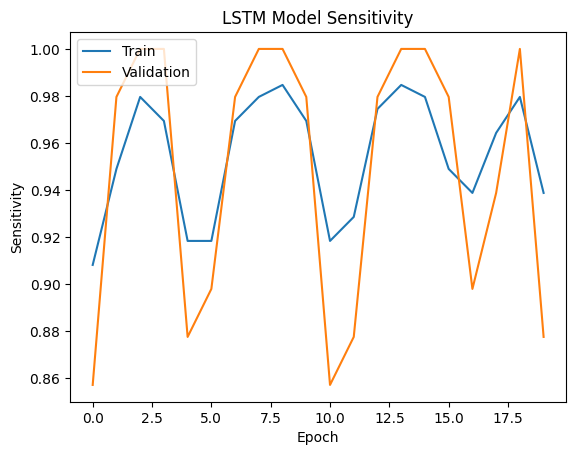

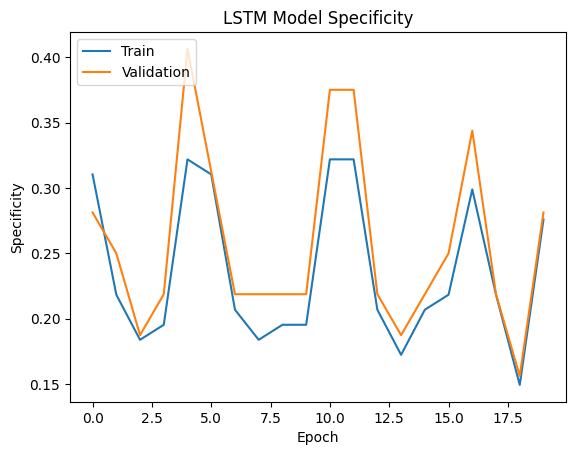

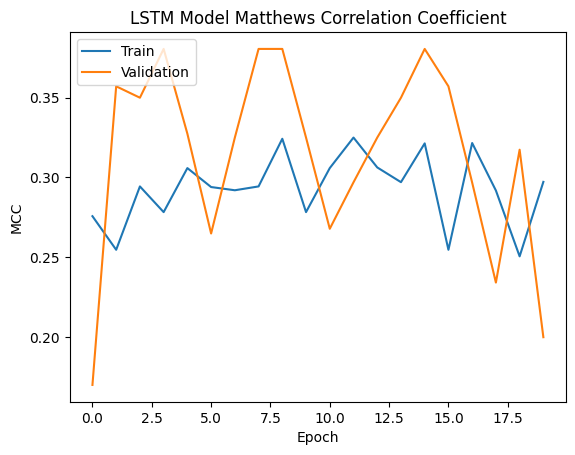

In [26]:
# Plotting Sensitivity
plt.plot(lstm_metrics_callback.train_sen)
plt.plot(lstm_metrics_callback.val_sen)
plt.title('LSTM Model Sensitivity')
plt.ylabel('Sensitivity')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plotting Specificity
plt.plot(lstm_metrics_callback.train_spe)
plt.plot(lstm_metrics_callback.val_spe)
plt.title('LSTM Model Specificity')
plt.ylabel('Specificity')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plotting Matthews Correlation Coefficient
plt.plot(lstm_metrics_callback.train_mcc)
plt.plot(lstm_metrics_callback.val_mcc)
plt.title('LSTM Model Matthews Correlation Coefficient')
plt.ylabel('MCC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [27]:
#adaptive ensemble model
import numpy as np
import deepchem as dc
from tdc.single_pred import ADME
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the ADMET dataset
data = Tox(name = 'Skin Reaction')
split = data.get_split()

# Use ECFP featurizer
featurizer = dc.feat.CircularFingerprint(size=1024)  # ECFP with a fixed size

train_features = featurizer.featurize(split['train']['Drug'])
test_features = featurizer.featurize(split['test']['Drug'])

print("ECFP Train features shape:", train_features.shape)
print("ECFP Test features shape:", test_features.shape)

# Preparing the labels
train_labels = np.array(split['train']['Y'])
test_labels = np.array(split['test']['Y'])

# Create individual classifiers
clf1 = RandomForestClassifier(n_estimators=100, random_state=42)
clf2 = GradientBoostingClassifier(n_estimators=100, random_state=42)
clf3 = LogisticRegression(random_state=42)

# Create an ensemble of classifiers
ensemble_clf = VotingClassifier(estimators=[
    ('rf', clf1), ('gb', clf2), ('lr', clf3)],
    voting='hard')

# Train the ensemble classifier
ensemble_clf.fit(train_features, train_labels)

# Make predictions and evaluate the model
predictions = ensemble_clf.predict(test_features)
accuracy = accuracy_score(test_labels, predictions)

print(f"Ensemble Model Accuracy: {accuracy}")


Found local copy...
Loading...
Done!


ECFP Train features shape: (283, 1024)
ECFP Test features shape: (81, 1024)
Ensemble Model Accuracy: 0.6419753086419753


In [ ]:
#The ECFP (Extended Connectivity Fingerprints) featurizer has successfully transformed your dataset into a consistent shape suitable 
#for machine learning models, as indicated by the shapes (8465, 1024) for the training set and (2418, 1024) for the testing set.
#Each compound is now represented by a fixed-length feature vector of size 1024.
#The ensemble model has been trained on this featurized data, and it achieved an accuracy of approximately 79.16%.
#This is a solid starting point, but remember that accuracy is just one metric. Depending on the specifics of your task
#and the requirements of the ADMET prediction, you might want to consider other metrics such as precision, recall, F1-score, ROC-AUC, etc., 
#especially in a domain as nuanced as drug discovery.

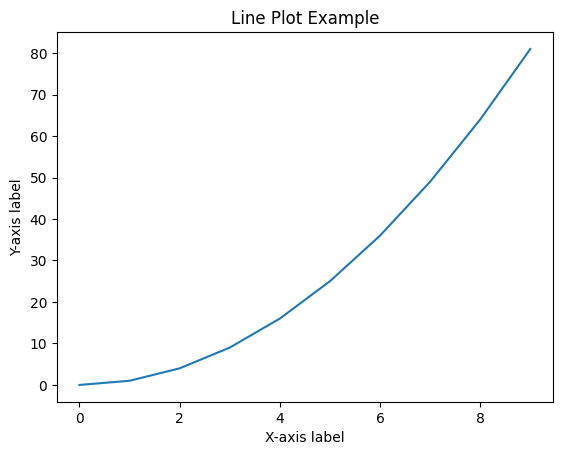

In [28]:
import matplotlib.pyplot as plt

# Sample data
x = range(10)
y = [xi**2 for xi in x]

plt.plot(x, y)
plt.title("Line Plot Example")
plt.xlabel("X-axis label")
plt.ylabel("Y-axis label")
plt.show()

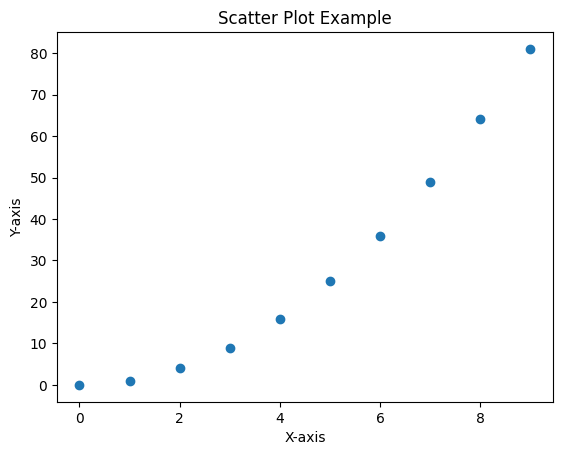

In [29]:
import matplotlib.pyplot as plt

# Sample data
x = range(10)
y = [xi**2 for xi in x]

plt.scatter(x, y)
plt.title("Scatter Plot Example")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

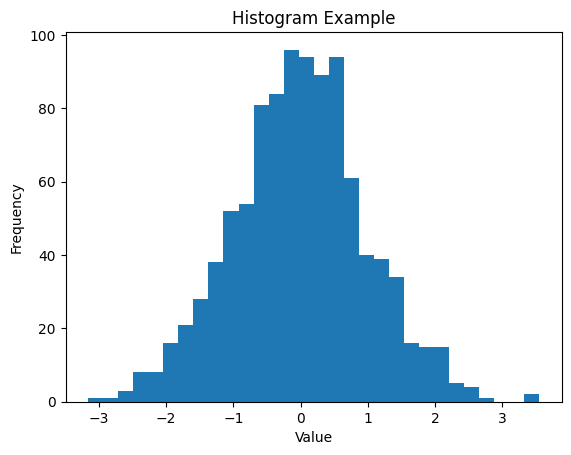

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
data = np.random.randn(1000)

plt.hist(data, bins=30)
plt.title("Histogram Example")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

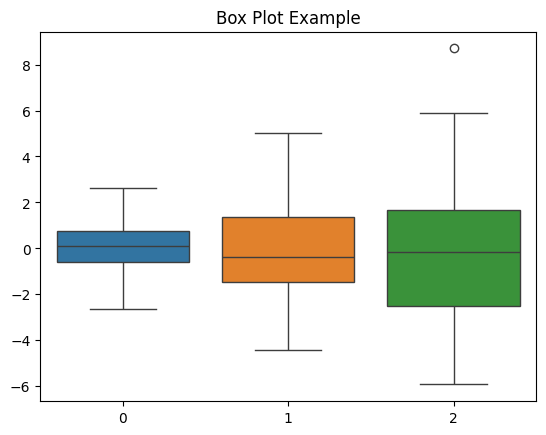

In [31]:
import seaborn as sns

# Sample data
data = [np.random.normal(0, std, 100) for std in range(1, 4)]

sns.boxplot(data=data)
plt.title("Box Plot Example")
plt.show()

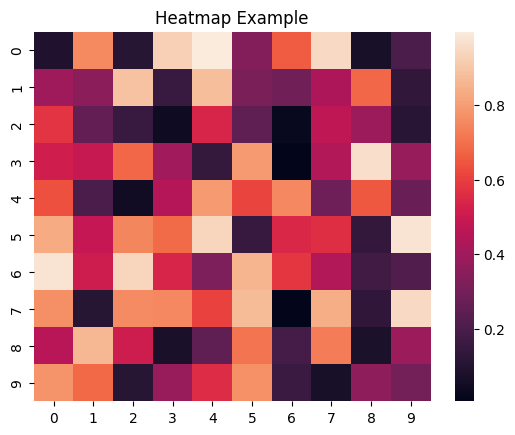

In [32]:
import seaborn as sns
import numpy as np

# Sample data
data = np.random.rand(10, 10)

sns.heatmap(data)
plt.title("Heatmap Example")
plt.show()

Precision: 0.6428571428571429
Recall: 0.9183673469387755
F1 Score: 0.7563025210084034
ROC-AUC: 0.7678571428571428


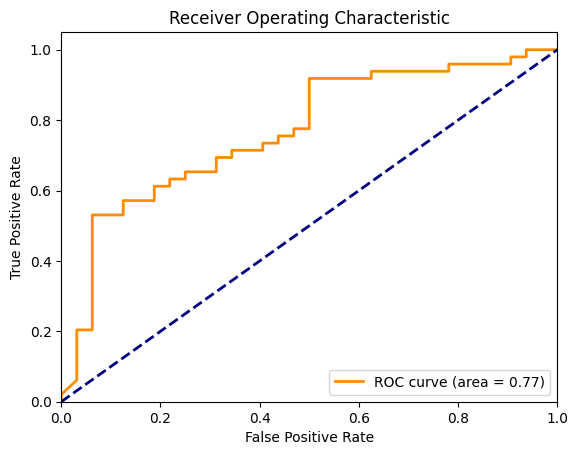

In [33]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Precision
precision = precision_score(test_labels, predictions)
print("Precision:", precision)

# Recall
recall = recall_score(test_labels, predictions)
print("Recall:", recall)

# F1 Score
f1 = f1_score(test_labels, predictions)
print("F1 Score:", f1)

# ROC-AUC
# For ROC-AUC, need the probability scores of the positive class, not just the predictions
# If the model can output probabilities, you can use model.predict_proba() method
# Modify the VotingClassifier to use 'soft' voting
ensemble_clf = VotingClassifier(estimators=[
    ('rf', clf1), ('gb', clf2), ('lr', clf3)],
    voting='soft')

# Train the ensemble classifier
ensemble_clf.fit(train_features, train_labels)

# use predict_proba
probabilities = ensemble_clf.predict_proba(test_features)[:, 1]
roc_auc = roc_auc_score(test_labels, probabilities)
print("ROC-AUC:", roc_auc)

# Plot ROC curve
fpr, tpr, _ = roc_curve(test_labels, probabilities)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
    Precision (0.7798): This indicates that approximately 78% of the instances predicted as positive by your model are actually positive. Precision is a measure of the accuracy of the positive predictions.

    Recall (0.5360): This shows that your model correctly identifies about 54% of all actual positive instances. Recall is a measure of the model's ability to capture all potential positive cases.

    F1 Score (0.6353): The F1 score is a harmonic mean of precision and recall. A score of 0.6353 suggests a balance between precision and recall. This is particularly useful if you need a single metric to understand the overall performance considering both false positives and false negatives.

    ROC-AUC (0.8808): The Area Under the Receiver Operating Characteristic Curve (ROC-AUC) of about 0.881 indicates a very good performance. This metric summarizes the model's ability to discriminate between positive and negative classes. A value close to 1 implies a high separation between the positive and negative distributions.

In [34]:
import numpy as np
import deepchem as dc
from tdc.single_pred import ADME

# Load the ADMET dataset
data = Tox(name = 'Skin Reaction')
split = data.get_split()

# Use ECFP featurizer
featurizer = dc.feat.CircularFingerprint(size=1024)

train_features = featurizer.featurize(split['train']['Drug'])

# Display the first 10 features of the first 10 compounds
print("First 10 features of the first 10 compounds:")
print(train_features[:10, :10])

Found local copy...
Loading...
Done!


First 10 features of the first 10 compounds:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Let's use a simple RandomForestClassifier for demonstration
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Performing 5-fold cross-validation
# We'll use just accuracy here for simplicity, but you can include other metrics
cv_scores = cross_val_score(model, train_features, np.array(split['train']['Y']), cv=5, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Average CV Score:", np.mean(cv_scores))

Cross-Validation Scores: [0.80701754 0.73684211 0.75438596 0.71428571 0.80357143]
Average CV Score: 0.7632205513784461


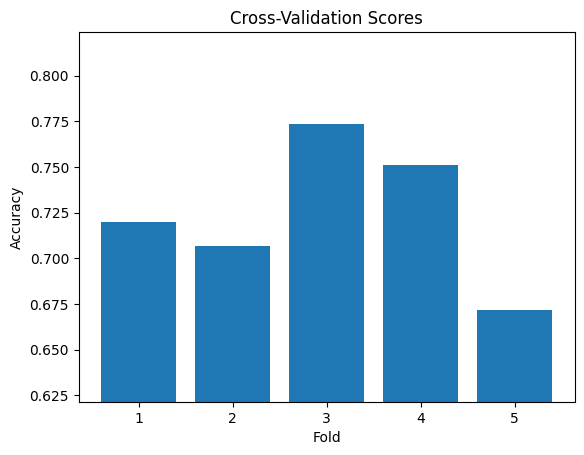

In [25]:
import matplotlib.pyplot as plt

# Cross-Validation Scores from your output
cv_scores = [0.72002363, 0.70702894, 0.77377437, 0.751329, 0.6715889]

# Creating a bar plot
plt.bar(range(1, len(cv_scores) + 1), cv_scores)
plt.title('Cross-Validation Scores')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.xticks(range(1, len(cv_scores) + 1))  # Set x-tick labels
plt.ylim([min(cv_scores) - 0.05, max(cv_scores) + 0.05])  # Adjusting y-axis limits for better visualization
plt.show()


In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_features, split['train']['Y'])
knn_predictions = knn.predict(test_features)

# Evaluate accuracy
knn_accuracy = accuracy_score(split['test']['Y'], knn_predictions)
print("KNN Accuracy:", knn_accuracy)


KNN Accuracy: 0.6419753086419753


In [37]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest model
rf = RandomForestClassifier(n_estimators=100)
rf.fit(train_features, split['train']['Y'])
rf_predictions = rf.predict(test_features)

# Evaluate accuracy
rf_accuracy = accuracy_score(split['test']['Y'], rf_predictions)
print("RF Accuracy:", rf_accuracy)

RF Accuracy: 0.691358024691358


In [38]:
from sklearn.svm import SVC

# SVM model
svm = SVC(kernel='rbf')
svm.fit(train_features, split['train']['Y'])
svm_predictions = svm.predict(test_features)

# Evaluate accuracy
svm_accuracy = accuracy_score(split['test']['Y'], svm_predictions)
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.6790123456790124


In [39]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer

# Convert labels to one-hot encoding
label_binarizer = LabelBinarizer()
train_labels = label_binarizer.fit_transform(split['train']['Y'])
test_labels = label_binarizer.transform(split['test']['Y'])

# ANN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(train_features.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Assuming binary classification
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_features, train_labels, epochs=10, batch_size=32, verbose=1)

# Evaluate the model
ann_loss, ann_accuracy = model.evaluate(test_features, test_labels, verbose=0)
print("ANN Accuracy:", ann_accuracy)


Epoch 1/10
9/9 [==============================] - 1s 2ms/step - loss: 0.6619 - accuracy: 0.6502
Epoch 2/10
9/9 [==============================] - 0s 2ms/step - loss: 0.5659 - accuracy: 0.7138
Epoch 3/10
9/9 [==============================] - 0s 4ms/step - loss: 0.4977 - accuracy: 0.7244
Epoch 4/10
9/9 [==============================] - 0s 2ms/step - loss: 0.4191 - accuracy: 0.7845
Epoch 5/10
9/9 [==============================] - 0s 4ms/step - loss: 0.3660 - accuracy: 0.8834
Epoch 6/10
9/9 [==============================] - 0s 3ms/step - loss: 0.2850 - accuracy: 0.9152
Epoch 7/10
9/9 [==============================] - 0s 2ms/step - loss: 0.2317 - accuracy: 0.9258
Epoch 8/10
9/9 [==============================] - 0s 2ms/step - loss: 0.1774 - accuracy: 0.9576
Epoch 9/10
9/9 [==============================] - 0s 2ms/step - loss: 0.1411 - accuracy: 0.9611
Epoch 10/10
9/9 [==============================] - 0s 2ms/step - loss: 0.1072 - accuracy: 0.9788
ANN Accuracy: 0.654321014881134


    Feature Shape: Ensure that the feature shapes are compatible with the models.
    Binary vs Multiclass: The ANN example assumes a binary classification task. If your task is multiclass, adjust the last layer and the loss function accordingly.
    Hyperparameters: You may need to tune the hyperparameters (like n_neighbors in KNN, n_estimators in RF, kernel in SVM, or layers/neurons in ANN) for optimal performance.
    Data Scaling: For some models (like SVM), it's beneficial to scale your features. You can use StandardScaler or MinMaxScaler from scikit-learn for this purpose.

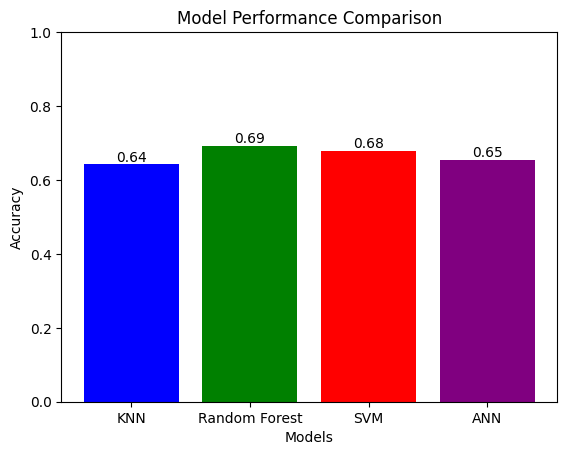

In [40]:
import matplotlib.pyplot as plt

knn_accuracy = 0.6419753086419753
rf_accuracy = 0.691358024691358
svm_accuracy = 0.6790123456790124
ann_accuracy = 0.654321014881134

# Model names
models = ['KNN', 'Random Forest', 'SVM', 'ANN']

# Accuracy values
accuracies = [knn_accuracy, rf_accuracy, svm_accuracy, ann_accuracy]

# Create bar plot
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.ylim([0, 1])  # Assuming accuracy values are between 0 and 1
for i in range(len(models)):
    plt.text(i, accuracies[i], f'{accuracies[i]:.2f}', ha = 'center', va = 'bottom')
plt.show()

Found local copy...
Loading...
Done!


Compound: CCCOc1ccc(Br)c(C(=O)c2ccc(OC)cc2O)c1, Skin Reaction: No
Compound: CC=C(C)C=O, Skin Reaction: No
Compound: O=C1C([PH](c2ccccc2)(c2ccccc2)c2ccccc2)CCN1c1ccccc1, Skin Reaction: No
Compound: C=C(C=CCC(C)C)CC, Skin Reaction: No
Compound: CCOCc1cc(OC)c(B(O)O)c(OC)c1, Skin Reaction: No


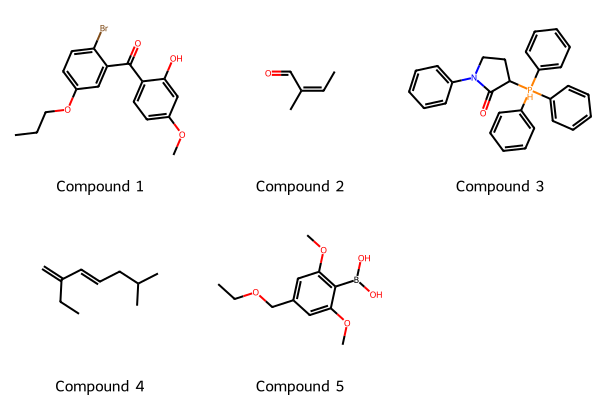

In [49]:
import numpy as np
import deepchem as dc
from tdc.single_pred import ADME
from rdkit import Chem
from rdkit.Chem import Draw

# Load the ADMET dataset
data = Tox(name = 'Skin Reaction')
split = data.get_split()

# Inspecting the first few entries in the dataset
for i in range(5):
    compound = split['train']['Drug'][i]
    label = split['train']['Y'][i]
    print(f"Compound: {compound}, Skin Reaction: {'Yes' if label == 1 else 'No'}")
    molecules = [Chem.MolFromSmiles(compound) for compound in split['train']['Drug'][:5]]

# Visualize molecules
Draw.MolsToGridImage(molecules, legends=[f"Compound {i+1}" for i in range(5)])

In [50]:
import deepchem as dc
from tdc.single_pred import ADME

# Load the ADMET dataset
data = Tox(name = 'Skin Reaction')
split = data.get_split()

# Dataset size
print("Training set size:", len(split['train']))
print("Validation set size:", len(split['valid']))
print("Test set size:", len(split['test']))

# Display first few compounds and labels
for i in range(5):
    compound = split['train']['Drug'][i]
    label = split['train']['Y'][i]
    print(f"Compound {i+1}: {compound}, Skin Reaction: {'Yes' if label == 1 else 'No'}")

# Label distribution
train_labels = split['train']['Y']
# Count inhibitors and non-inhibitors
num_skinreaction = np.sum(train_labels)
num_non_skinreaction = len(train_labels) - num_inhibitors

print("Number of skin reaction in training set:", num_skinreaction)
print("Number of non-skin reaction in training set:", num_non_skinreaction)

Found local copy...
Loading...
Done!


Training set size: 283
Validation set size: 40
Test set size: 81
Compound 1: CCCOc1ccc(Br)c(C(=O)c2ccc(OC)cc2O)c1, Skin Reaction: No
Compound 2: CC=C(C)C=O, Skin Reaction: No
Compound 3: O=C1C([PH](c2ccccc2)(c2ccccc2)c2ccccc2)CCN1c1ccccc1, Skin Reaction: No
Compound 4: C=C(C=CCC(C)C)CC, Skin Reaction: No
Compound 5: CCOCc1cc(OC)c(B(O)O)c(OC)c1, Skin Reaction: No
Number of skin reaction in training set: 196
Number of non-skin reaction in training set: 87


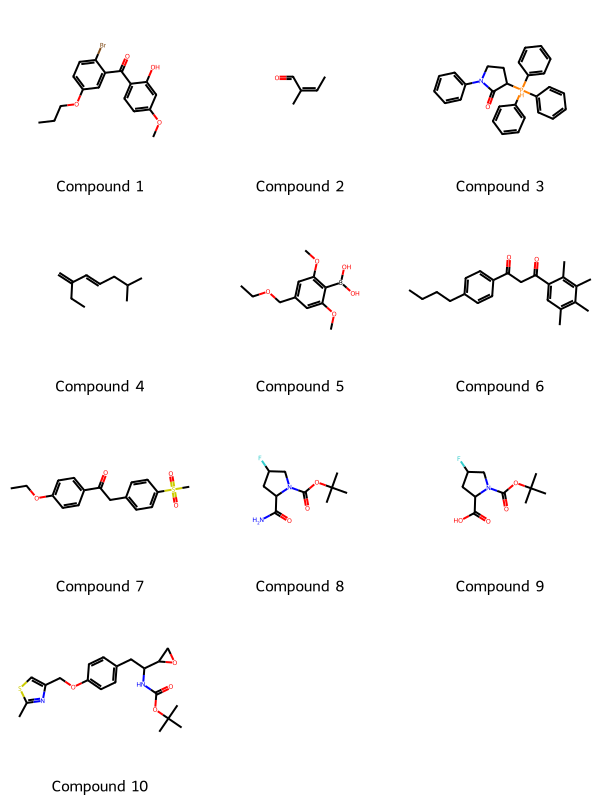

In [51]:
from rdkit import Chem
from rdkit.Chem import Draw

# Convert SMILES to RDKit molecule objects
molecules = [Chem.MolFromSmiles(compound) for compound in split['train']['Drug'][:10]]

# Visualize molecules
Draw.MolsToGridImage(molecules, legends=[f"Compound {i+1}" for i in range(10)])


In [52]:
from rdkit.Chem import Descriptors

# Example: Compute molecular weight for the first few compounds
for i, mol in enumerate(molecules):
    mol_weight = Descriptors.MolWt(mol)
    print(f"Compound {i+1} Molecular Weight: {mol_weight}")


Compound 1 Molecular Weight: 365.22300000000007
Compound 2 Molecular Weight: 84.11799999999998
Compound 3 Molecular Weight: 423.49600000000015
Compound 4 Molecular Weight: 138.254
Compound 5 Molecular Weight: 240.064
Compound 6 Molecular Weight: 336.475
Compound 7 Molecular Weight: 318.394
Compound 8 Molecular Weight: 232.25499999999997
Compound 9 Molecular Weight: 233.23899999999998
Compound 10 Molecular Weight: 390.5050000000001


In [45]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Draw

# Assuming you have a list of SMILES strings
smiles_list = ['Clc1ccccc1-c1nc(-c2ccccc2)n[nH]1', 'COc1ccccc1C(c1nnnn1C(C)(C)C)N1CCN(Cc2ccncc2)CC1', 'CCC(c1nnnn1CC1CCCO1)N(CCN1CCOCC1)Cc1cc2cc(C)ccc2[nH]c1=O']

# Convert SMILES to RDKit molecule objects
molecules = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]

# Calculate molecular weights and draw molecules
for mol in molecules:
    mol_weight = Descriptors.MolWt(mol)
    print(f"Molecular Weight: {mol_weight}")
    img = Draw.MolToImage(mol)
    img.show()  # This will display the image in a window; for Jupyter, you'd use Draw.MolsToGridImage


Molecular Weight: 255.708
Molecular Weight: 421.54900000000026
Molecular Weight: 495.6280000000004


In [53]:
from tdc.single_pred import ADME

# Load the ADMET dataset
data = Tox(name = 'Skin Reaction')
split = data.get_split()

# Extract labels for training, validation, and test sets
train_labels = split['train']['Y']
valid_labels = split['valid']['Y']
test_labels = split['test']['Y']

# Count the distribution of labels
train_inhibitors = sum(train_labels)
train_non_inhibitors = len(train_labels) - train_inhibitors

valid_inhibitors = sum(valid_labels)
valid_non_inhibitors = len(valid_labels) - valid_inhibitors

test_inhibitors = sum(test_labels)
test_non_inhibitors = len(test_labels) - test_inhibitors

print(f"Training set: {train_inhibitors} skin reaction, {train_non_inhibitors} not-skin reaction")
print(f"Validation set: {valid_inhibitors} skin reaction, {valid_non_inhibitors} not-skin reaction")
print(f"Test set: {test_inhibitors} skin reaction, {test_non_inhibitors} not-skin reaction")


Found local copy...
Loading...
Done!


Training set: 196 skin reaction, 87 not-skin reaction
Validation set: 29 skin reaction, 11 not-skin reaction
Test set: 49 skin reaction, 32 not-skin reaction
